In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid.csv')
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,1.21,30.0,1.00,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...,...,...
10211,2022-01-31 20:00:00,0.000000,0,20,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10212,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10213,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10214,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000


<AxesSubplot:ylabel='Density'>

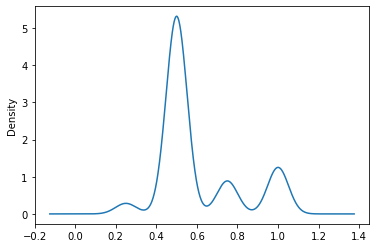

In [3]:
#data.loc[data.Energy_kWh > 3,'Energy_kWh'].plot.density()
data.loc[data.Energy_kWh > 3,'measure'].plot.density()

In [4]:
data_test = pd.read_csv(r'./charge0322_hourly_with_Covid.csv')

<AxesSubplot:ylabel='Density'>

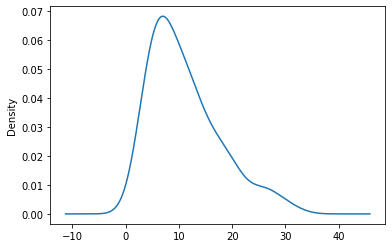

In [5]:
data_test.loc[data_test.Energy_kWh > 3, 'Energy_kWh'].plot.density()

## training set

In [6]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,1.21,30.0,1.00,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...,...,...
10211,2022-01-31 20:00:00,0.000000,0,20,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10212,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10213,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000
10214,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000


In [7]:
data['Energy_kWh_1'] = data['Energy_kWh'].shift(-1)
data['Energy_kWh_2'] = data['Energy_kWh'].shift(-2)
data['Energy_kWh_3'] = data['Energy_kWh'].shift(-3)
data['Energy_kWh_4'] = data['Energy_kWh'].shift(-4)
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,1.21,30.0,1.00,NaN,NaN,NaN,0.560625,0.000000,0.000000,0.000558
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,1.21,30.0,1.00,4.214567,NaN,NaN,0.000000,0.000000,0.000558,0.000000
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,1.21,30.0,1.00,0.560625,4.214567,NaN,0.000000,0.000558,0.000000,0.000000
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.00,0.000000,0.560625,4.214567,0.000558,0.000000,0.000000,0.000000
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,1.21,30.0,1.00,0.000000,0.000000,0.560625,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10211,2022-01-31 20:00:00,0.000000,0,20,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10212,2022-01-31 21:00:00,0.000000,0,21,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10213,2022-01-31 22:00:00,0.000000,0,22,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
10214,2022-01-31 23:00:00,0.000000,0,23,NaN,False,0.96,20.0,0.25,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
data = data.iloc[3:10031]
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,1.21,30.0,1.0,0.000000,0.560625,4.214567,0.000558,0.000000,0.000000,0.000000
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,1.21,30.0,1.0,0.000000,0.000000,0.560625,0.000000,0.000000,0.000000,0.000000
5,2020-12-02 14:00:00,0.000000,2,14,NaN,False,1.21,30.0,1.0,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2020-12-02 15:00:00,0.000000,2,15,NaN,False,1.21,30.0,1.0,0.000000,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000
7,2020-12-02 16:00:00,0.000000,2,16,NaN,False,1.21,30.0,1.0,0.000000,0.000000,0.000558,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10026,2022-01-24 03:00:00,0.000000,0,3,NaN,False,1.09,11.0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.032992
10027,2022-01-24 04:00:00,0.000000,0,4,NaN,False,1.09,11.0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,14.032992,25.078008
10028,2022-01-24 05:00:00,0.000000,0,5,NaN,False,1.09,11.0,0.5,0.000000,0.000000,0.000000,0.000000,14.032992,25.078008,9.667508
10029,2022-01-24 06:00:00,0.000000,0,6,NaN,False,1.09,11.0,0.5,0.000000,0.000000,0.000000,14.032992,25.078008,9.667508,0.000000


In [9]:
data.reset_index(inplace=True)

In [10]:
df = data.drop(['index', 'hols', 'Time'], axis=1)
df.loc[:, 'measure'] = data['measure']*4
df.loc[:, 'measure'] = df['measure'].astype(int)
df

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,0.000000,2,12,False,1.21,30.0,4,0.000000,0.560625,4.214567,0.000558,0.000000,0.000000,0.000000
1,0.000558,2,13,False,1.21,30.0,4,0.000000,0.000000,0.560625,0.000000,0.000000,0.000000,0.000000
2,0.000000,2,14,False,1.21,30.0,4,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,2,15,False,1.21,30.0,4,0.000000,0.000558,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,2,16,False,1.21,30.0,4,0.000000,0.000000,0.000558,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023,0.000000,0,3,False,1.09,11.0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.032992
10024,0.000000,0,4,False,1.09,11.0,2,0.000000,0.000000,0.000000,0.000000,0.000000,14.032992,25.078008
10025,0.000000,0,5,False,1.09,11.0,2,0.000000,0.000000,0.000000,0.000000,14.032992,25.078008,9.667508
10026,0.000000,0,6,False,1.09,11.0,2,0.000000,0.000000,0.000000,14.032992,25.078008,9.667508,0.000000


<AxesSubplot:>

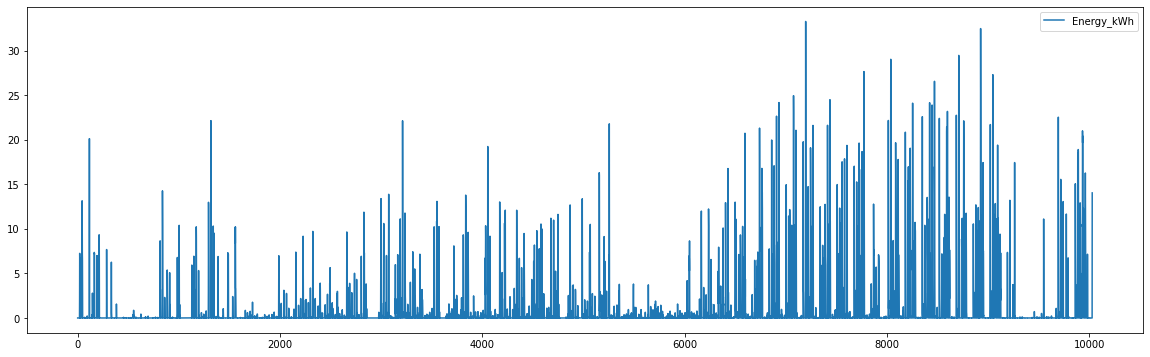

In [11]:
sample = df[['Energy_kWh']].copy()
#sample.loc[sample.Energy_kWh > 6,'Energy_kWh'] = 0
sample.plot(figsize=(20,6))
#sample

In [12]:
df.loc[df.Energy_kWh > 3, 'hour'].unique()

array([ 8,  9, 14, 10, 11,  7, 13, 12,  6, 15, 18, 16, 17,  5, 19])

## test set

In [13]:
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3
0,2022-02-01 08:00:00,20.445542,1,8,NaN,False,0.930,15.0,0.25,13.311142,3.249800,0.000000
1,2022-02-01 09:00:00,13.989892,1,9,NaN,False,0.930,15.0,0.25,20.445542,13.311142,3.249800
2,2022-02-01 10:00:00,6.558958,1,10,NaN,False,0.930,15.0,0.25,13.989892,20.445542,13.311142
3,2022-02-01 11:00:00,11.839467,1,11,NaN,False,0.930,15.0,0.25,6.558958,13.989892,20.445542
4,2022-02-01 12:00:00,7.112458,1,12,NaN,False,0.930,15.0,0.25,11.839467,6.558958,13.989892
...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000925
661,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000
662,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000
663,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000


In [14]:
data_test['Energy_kWh_1'] = data_test['Energy_kWh'].shift(-1)
data_test['Energy_kWh_2'] = data_test['Energy_kWh'].shift(-2)
data_test['Energy_kWh_3'] = data_test['Energy_kWh'].shift(-3)
data_test['Energy_kWh_4'] = data_test['Energy_kWh'].shift(-4)
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-02-01 08:00:00,20.445542,1,8,NaN,False,0.930,15.0,0.25,13.311142,3.249800,0.000000,13.989892,6.558958,11.839467,7.112458
1,2022-02-01 09:00:00,13.989892,1,9,NaN,False,0.930,15.0,0.25,20.445542,13.311142,3.249800,6.558958,11.839467,7.112458,5.206825
2,2022-02-01 10:00:00,6.558958,1,10,NaN,False,0.930,15.0,0.25,13.989892,20.445542,13.311142,11.839467,7.112458,5.206825,6.653358
3,2022-02-01 11:00:00,11.839467,1,11,NaN,False,0.930,15.0,0.25,6.558958,13.989892,20.445542,7.112458,5.206825,6.653358,6.699742
4,2022-02-01 12:00:00,7.112458,1,12,NaN,False,0.930,15.0,0.25,11.839467,6.558958,13.989892,5.206825,6.653358,6.699742,1.031750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000925,0.000000,0.000000,0.000000,0.000000
661,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
662,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
663,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [15]:
data_test = data_test.iloc[:-4]
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-02-01 08:00:00,20.445542,1,8,NaN,False,0.930,15.0,0.25,13.311142,3.249800,0.000000,13.989892,6.558958,11.839467,7.112458
1,2022-02-01 09:00:00,13.989892,1,9,NaN,False,0.930,15.0,0.25,20.445542,13.311142,3.249800,6.558958,11.839467,7.112458,5.206825
2,2022-02-01 10:00:00,6.558958,1,10,NaN,False,0.930,15.0,0.25,13.989892,20.445542,13.311142,11.839467,7.112458,5.206825,6.653358
3,2022-02-01 11:00:00,11.839467,1,11,NaN,False,0.930,15.0,0.25,6.558958,13.989892,20.445542,7.112458,5.206825,6.653358,6.699742
4,2022-02-01 12:00:00,7.112458,1,12,NaN,False,0.930,15.0,0.25,11.839467,6.558958,13.989892,5.206825,6.653358,6.699742,1.031750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,2022-02-28 16:00:00,0.007133,0,16,Spring holiday,True,1.265,10.0,0.25,0.047292,0.000000,0.000000,0.000925,0.000000,0.000000,0.000000
657,2022-02-28 17:00:00,0.000925,0,17,Spring holiday,True,1.265,10.0,0.25,0.007133,0.047292,0.000000,0.000000,0.000000,0.000000,0.000000
658,2022-02-28 18:00:00,0.000000,0,18,Spring holiday,True,1.265,10.0,0.25,0.000925,0.007133,0.047292,0.000000,0.000000,0.000000,0.000000
659,2022-02-28 19:00:00,0.000000,0,19,Spring holiday,True,1.265,10.0,0.25,0.000000,0.000925,0.007133,0.000000,0.000000,0.000000,0.000000


In [16]:
df_test = data_test.drop(['hols', 'Time'], axis=1)
df_test.loc[:, 'measure'] = data_test['measure']*4
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)
df_test

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,20.445542,1,8,False,0.930,15.0,1,13.311142,3.249800,0.000000,13.989892,6.558958,11.839467,7.112458
1,13.989892,1,9,False,0.930,15.0,1,20.445542,13.311142,3.249800,6.558958,11.839467,7.112458,5.206825
2,6.558958,1,10,False,0.930,15.0,1,13.989892,20.445542,13.311142,11.839467,7.112458,5.206825,6.653358
3,11.839467,1,11,False,0.930,15.0,1,6.558958,13.989892,20.445542,7.112458,5.206825,6.653358,6.699742
4,7.112458,1,12,False,0.930,15.0,1,11.839467,6.558958,13.989892,5.206825,6.653358,6.699742,1.031750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.007133,0,16,True,1.265,10.0,1,0.047292,0.000000,0.000000,0.000925,0.000000,0.000000,0.000000
657,0.000925,0,17,True,1.265,10.0,1,0.007133,0.047292,0.000000,0.000000,0.000000,0.000000,0.000000
658,0.000000,0,18,True,1.265,10.0,1,0.000925,0.007133,0.047292,0.000000,0.000000,0.000000,0.000000
659,0.000000,0,19,True,1.265,10.0,1,0.000000,0.000925,0.007133,0.000000,0.000000,0.000000,0.000000


# Multi-point forecasting model based on fastai Tabular Learner (FNN)

In [17]:
# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score


In [18]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [19]:
cont_df

['R', 'IC_number', 'E_1', 'E_2', 'E_3']

In [20]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [21]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_nn = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [22]:
dls = to_nn.dataloaders(150)

In [23]:
from fastai.tabular.all import*

In [24]:
learn = tabular_learner(dls, wd=0.02, y_range=(0, 36), layers=[1000,500], n_out=5, loss_func=multiPointLoss)

SuggestedLRs(valley=0.0020892962347716093)

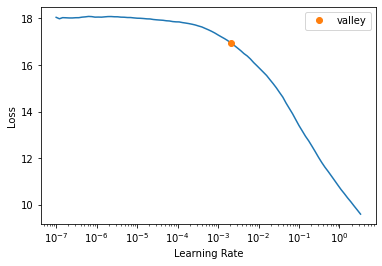

In [25]:
learn.lr_find()

In [26]:
learn.fine_tune(25, 2e-3)

epoch,train_loss,valid_loss,time
0,12.809046,9.117514,00:02


epoch,train_loss,valid_loss,time
0,8.702684,7.508720,00:03
1,7.968364,6.844492,00:03
2,7.453561,6.200634,00:02
3,6.923737,6.219496,00:03
4,6.229130,5.022872,00:02
5,5.499074,4.591808,00:02
6,3.901001,2.748148,00:02
7,3.176011,2.666812,00:02
8,2.913576,2.573474,00:03
9,2.791111,2.465847,00:02


In [27]:
learn.eval()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(3, 3)
    (3): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=26, out_features=1000, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1000, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=5, bias=True)
    )
    (3): SigmoidRange(low=0, high=36)
  )
)

In [28]:
cont_df_test,cat_df_test = cont_cat_split(df_test, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [29]:
procs_nn = [Categorify, Normalize]
to_test = TabularPandas(df_test, procs_nn, cat_df_test, cont_df_test, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [30]:
dls_test = to_test.dataloaders()

In [31]:
preds,targs = learn.get_preds(dl=dls_test[0])

In [32]:
preds.shape

torch.Size([661, 5])

In [33]:
preds.shape

torch.Size([661, 5])

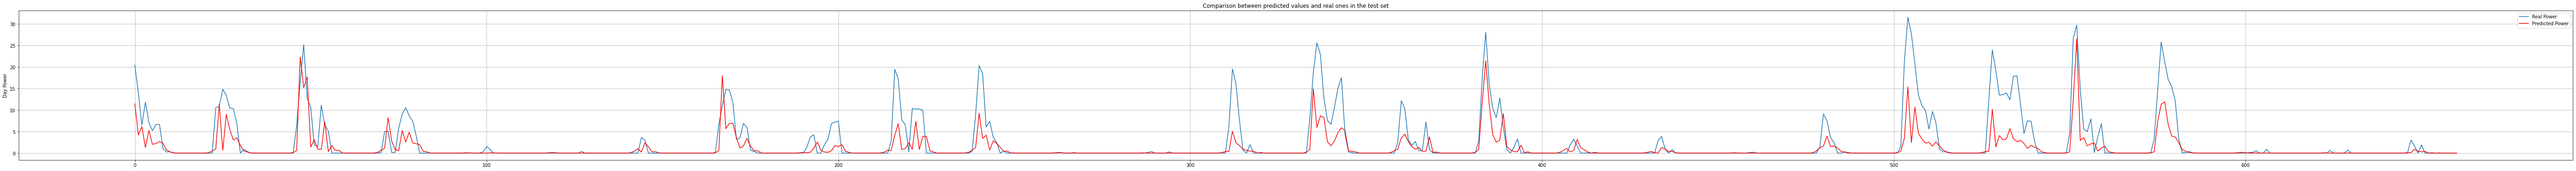

In [34]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

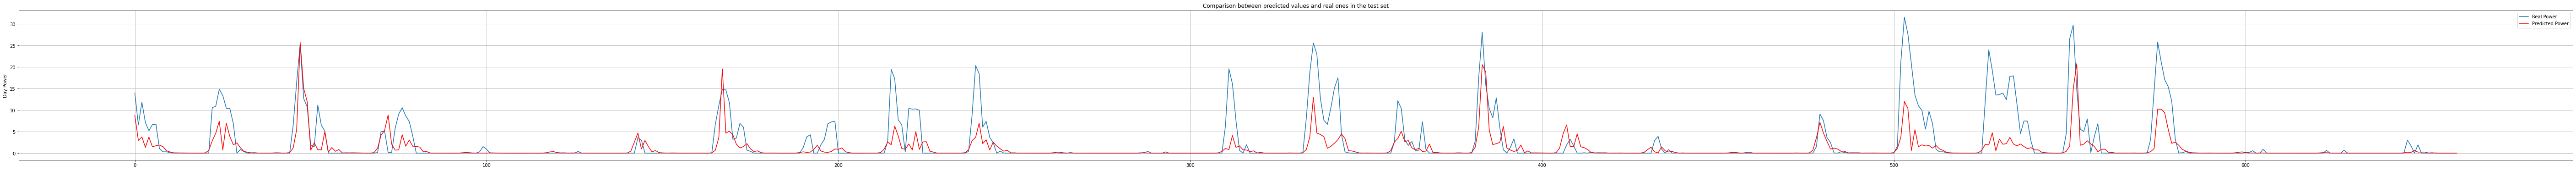

In [35]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,1])
plt.plot(range(len(preds)), preds[:,1], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

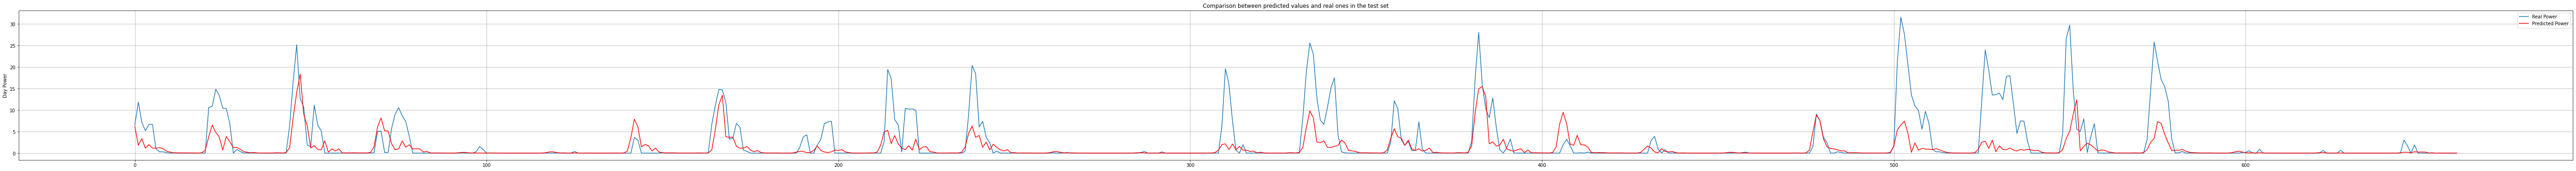

In [36]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,2])
plt.plot(range(len(preds)), preds[:,2], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

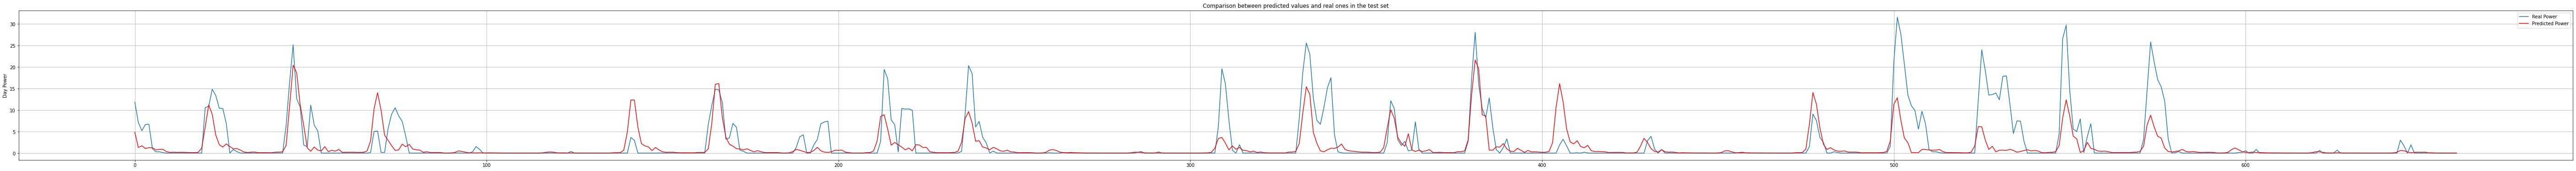

In [37]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,3])
plt.plot(range(len(preds)), preds[:,3], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

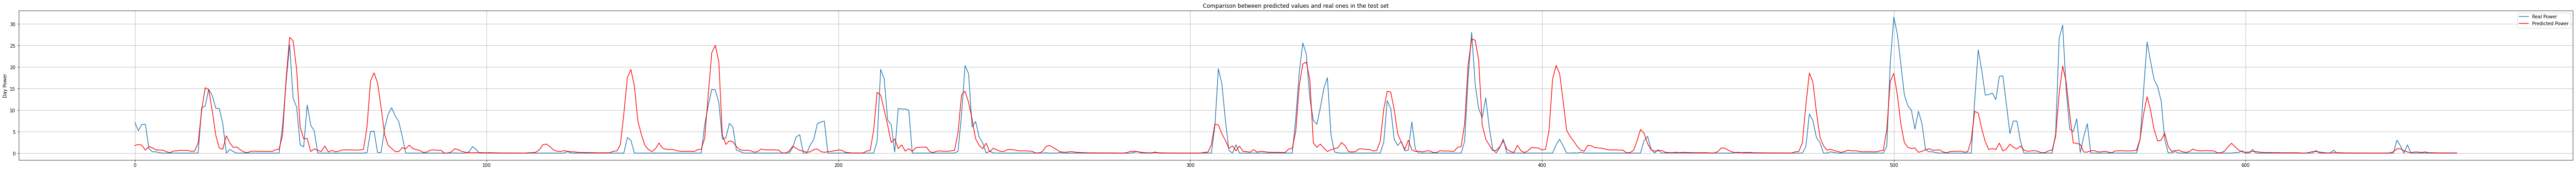

In [38]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,4])
plt.plot(range(len(preds)), preds[:,4], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

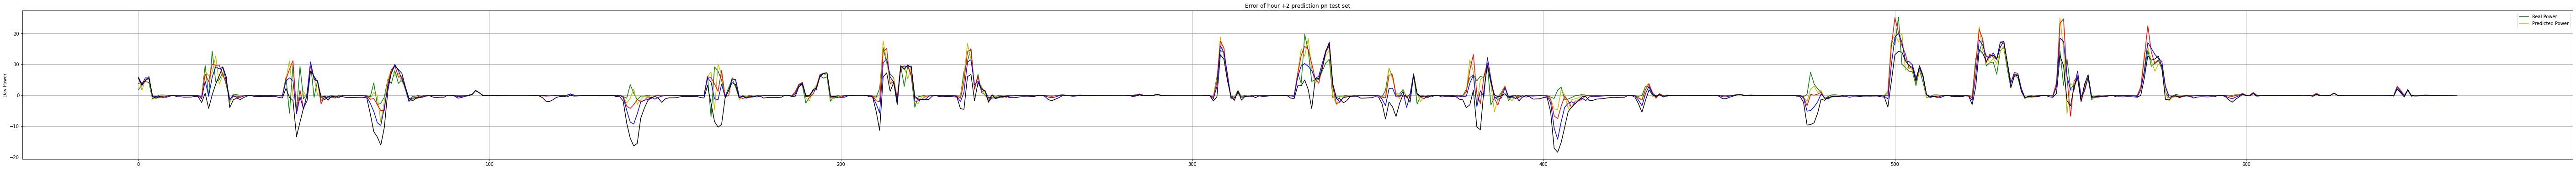

In [39]:
plt.figure(figsize=(100,6))
plt.plot(range(len(preds)-4), targs[4:,0] - preds[4:,0], 'g')
plt.plot(range(len(preds)-3), targs[3:,1] - preds[3:,1], 'y')
plt.plot(range(len(preds)-2), targs[2:,2] - preds[2:,2], 'r')
plt.plot(range(len(preds)-1), targs[1:,3] - preds[1:,3], 'b')
plt.plot(range(len(preds)), targs[:,4] - preds[:,4], 'k')
plt.title('Error of hour +2 prediction pn test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

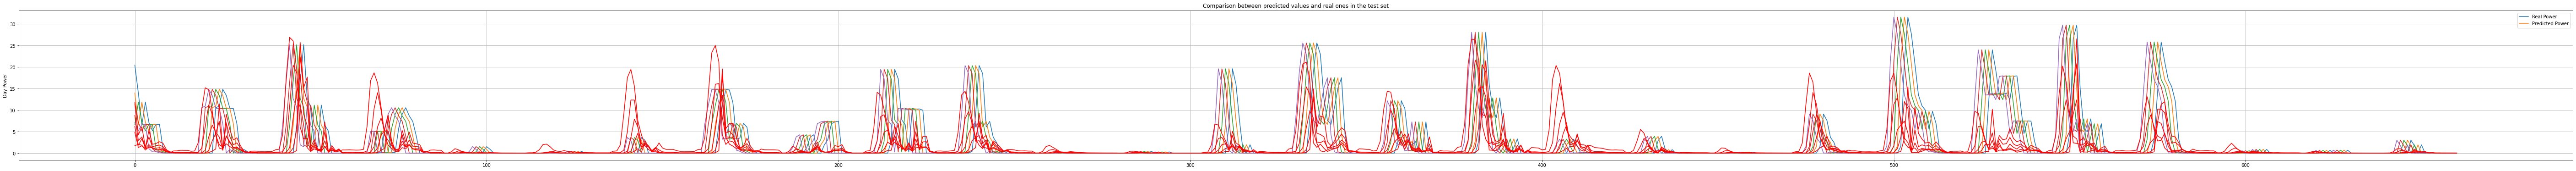

In [40]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,:])
plt.plot(range(len(preds)), preds[:,:], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [37]:
preds,targs = learn.get_preds()

In [38]:
dls.valid.items

,Energy_kWh,weekday,hour,is_hol,R,IC_number,measure,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
1150,1.554242,2,11,1,-0.605028,0.392239,3,0.110208,0.003600,0.674067,3.233783
9699,0.717833,1,16,1,0.584576,-0.246756,1,0.000000,0.000000,0.000000,0.000000
5333,0.000000,1,18,2,-0.902429,-1.408564,1,0.006083,0.003967,0.000000,0.000000
2381,0.006833,4,18,1,0.138474,0.856962,3,0.000000,0.000000,0.000000,0.000000
7130,0.021392,6,15,1,0.212825,-1.118112,1,0.064142,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2277,0.000000,7,10,1,0.398700,0.334148,3,0.000000,0.000000,1.725667,0.000000
3764,0.000000,6,9,2,-0.679378,0.624601,2,0.397150,0.000000,0.000000,0.000000
10018,0.000000,7,23,1,0.287175,-1.060022,1,0.000000,0.000000,0.000000,0.000000
4342,0.155708,2,11,1,-1.088305,-1.176203,2,0.000000,0.000000,0.000000,0.000000


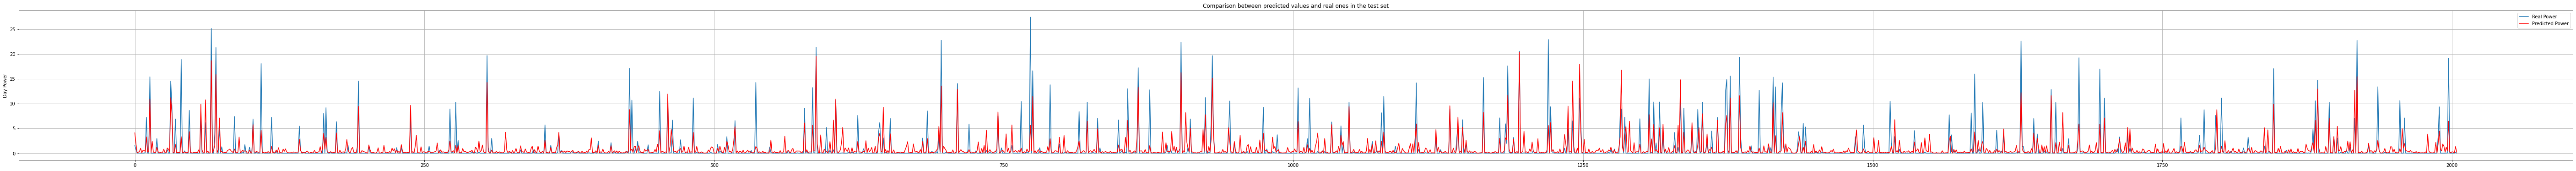

In [39]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Comparison between predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()